# Exploring Why Civil Resistance Works
---

> Gaganis Michail, Pregraduate Student <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8200234@aueb.gr

* This presentation contains a study on the Civil Resistance movements across the world from 1900-onwards.

* This study takes inspiration from the book [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan.

* The research done in this repository is done in the in the context of the *Applied Machine Learning* course, taught by *Mr. Panos Louridas* at the *Department of Management Science and Technology, AUEB*. The assignment can be found [here](/assignment/wcrw_v2.ipynb).

* The study takes place in November-December of `2023`, and references data up until that point in time.

# Before we Start

We first need to go over the dependecies needed for this notebook to function properly, as well as introduce our data.

### Dependencies for this Notebook

* In this Jupyter Notebook we shall use Python modules that the reader may or may not have installed. 
* The following code block shall install those for them so that no functionality problems arise due to missing modules.

* Links to documentation for all modules used can be found below:<br/>
-[Numpy](https://numpy.org/)<br/>
-[Scikit-learn](https://scikit-learn.org/stable/)<br/>
-[MatPlotLib](https://matplotlib.org/)<br/>
-[Pandas](https://pandas.pydata.org/)<br/>
-Seaborn
-Statsmodels

In [74]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install statsmodels

* We should go ahead and import the modules as well.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

### Data Used 
* For our research we will draw data from the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). In the repository is included the [NAVCO Data dictionary](data/NAVCO_data_dictionary.pdf) that provides more clarity as to what the different variables measure.

* We shall also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), available from [Integrated Network for Societal Conflict Research (INSCR)](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls). The [Polity5 Data Dictionary](data/Polity5DataDictionary.pdf) is provided as well for all intensive purposes.

* We load our data in *Pandas Dataframes* so we can use them for analysis.

In [126]:
navco_data = pd.read_csv('data/NAVCO_data.tab', sep='\t')
navco_data.head(5)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0


In [127]:
polity_data = pd.read_csv('data/polity_data.csv')
polity_data.head(5)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,...,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Introduction

* Erica Chenoweth and Maria J. Stephan published a book in 2011 called *Why Civil Resistance Works: The Strategic Logic of Nonviolent Conflict*. 

* The book contains an in-depth analysis of many Civil Resistance movements through 1900 to 2006, and seeks to compare the success rate of violent and non-violent movements.
* The dataset used to draw conclusions for the book is public and used in this notebook.
* This presentation is complementary to the book as it seeks to cross-validate the findings noted, as well as dig deeper and draw its own cocnlusions.

>## 1. Exploration of Historical Trends
>Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

* We take a look at the frequency of violent and non-violent events over the years.
* The `EYEAR` column describes the year a campaign ended, so were going to use that for refrence. Meaning, we count an event in a decade if it ended in that decade.
* We should check whether all events have valid end years.

In [128]:
navco_data['EYEAR'].isna().sum()

0

* So all our entries our valid.
* We should also check the span of the years so that we don't find any irregularities, and we should also need the span for our graph later on.

In [131]:
print(navco_data['EYEAR'].min().astype(int), navco_data['EYEAR'].max().astype(int))

1946 2014


* The end years of events span from `1946 - 2014` so we shall counts the decades from the `40's` up until the `2010's`.
* We go ahead and create a frame with the relevant information.
* The `VIOL` and `NONVIOL` columns are binary columns, indicating whether or not an event was violent.

In [133]:
rounded_down_data = pd.DataFrame({
    'ID': navco_data['NAVCOID'],
    'Year': (10 * (navco_data['EYEAR'] // 10)),
    'Not Violent': navco_data['NONVIOL'],
    'Violent': navco_data['VIOL']
})
rounded_down_data.head()

,ID,Year,Not Violent,Violent
0,4.0,1970.0,0.0,1.0
1,3.0,1980.0,0.0,1.0
2,218.0,1990.0,0.0,1.0
3,217.0,2010.0,0.0,1.0
4,5.0,1990.0,1.0,0.0


* We create 2 seperate frames that contain the sum of violent and non-violent events for wach decade.

In [134]:
violent_data = rounded_down_data.groupby(by = 'Year')['Violent'].sum()
non_violent_data = rounded_down_data.groupby(by = 'Year')['Not Violent'].sum()

* And now we can plot them as we like.
* We're using a *stack plot* for this purpose.
* The stack plot shows the cumulative events on each decade, and diversifies between violent and not by color. 

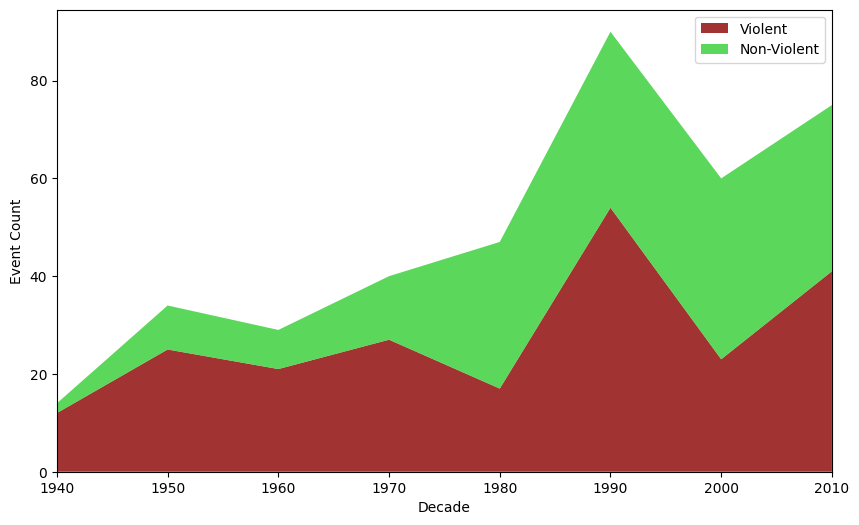

In [135]:
plt.figure(figsize=(10, 6))
plt.stackplot(
    violent_data.index, [violent_data, non_violent_data],
    labels=['Violent', 'Non-Violent'],
    colors=['darkred', 'limegreen'],
    alpha=0.8
)
plt.xlabel('Decade')
plt.ylabel('Event Count')
plt.legend()
plt.xlim(1940, 2010)
plt.show()

>Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics.

* To achieve this, we first need to keep the number of succesful non-violent campaigns.

In [136]:
successful_nonviolent_data = rounded_down_data[(rounded_down_data['Not Violent'] == 1) & (navco_data['SUCCESS'] == 1)]
decade_counts = successful_nonviolent_data.groupby('Year')['ID'].count().reset_index()
decade_counts.columns = ['Year', 'Successful Events']
decade_counts

,Year,Successful Events
0,1940.0,1
1,1950.0,2
2,1960.0,2
3,1970.0,7
4,1980.0,14
5,1990.0,30
6,2000.0,25
7,2010.0,13


* And keep them together with the number of non violent events in total, to divide:

In [137]:
non_violent_data = non_violent_data.reset_index()  # Resetting index to make 'Year' a column
non_violent_with_success = pd.merge(non_violent_data, decade_counts, on='Year', how='left')

non_violent_with_success

,Year,Not Violent,Successful Events
0,1940.0,2.0,1
1,1950.0,9.0,2
2,1960.0,8.0,2
3,1970.0,13.0,7
4,1980.0,30.0,14
5,1990.0,36.0,30
6,2000.0,37.0,25
7,2010.0,34.0,13


* So we calculate the percentage of success per decade:

In [138]:
non_violent_with_success['Percentage of Success'] = non_violent_with_success['Successful Events'] / non_violent_with_success['Not Violent']
non_violent_with_success

,Year,Not Violent,Successful Events,Percentage of Success
0,1940.0,2.0,1,0.500000
1,1950.0,9.0,2,0.222222
2,1960.0,8.0,2,0.250000
3,1970.0,13.0,7,0.538462
4,1980.0,30.0,14,0.466667
5,1990.0,36.0,30,0.833333
6,2000.0,37.0,25,0.675676
7,2010.0,34.0,13,0.382353


* Now we can plot our data.

* We use a twin axis plot, meaning that there are 2 different *y axes* on the same *x axis*. 
* The y axis on the left shows the number of non-violent campaigns per decade.
* The y axis on the right shows a percentage of successful non-violent campaigns per decade. 
* The bars are color coded and match with the color they share with the axis.

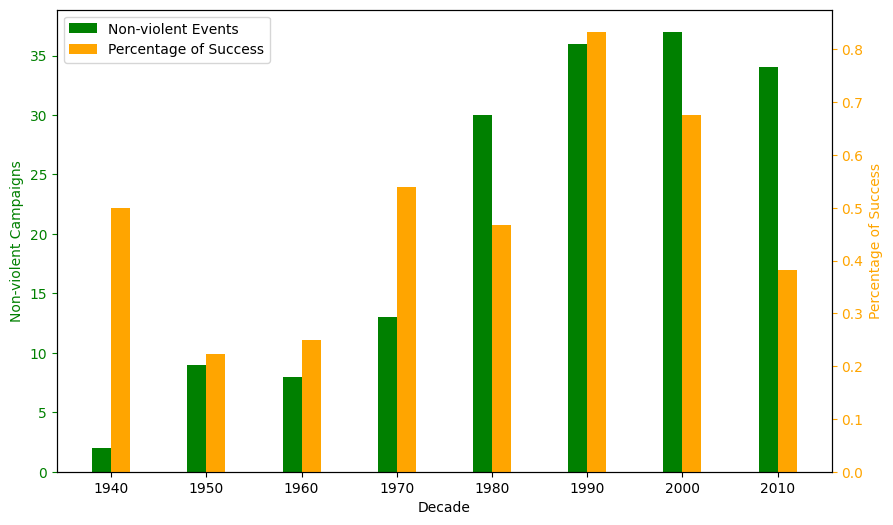

In [139]:
fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 2
bar1 = ax1.bar(non_violent_with_success['Year'] - bar_width/2, non_violent_with_success['Not Violent'], bar_width, label='Non-violent Events', color='green')
#set labels & ticks for 1 axis
ax1.set_xlabel('Decade')
ax1.set_ylabel('Non-violent Campaigns', color='green')
ax1.tick_params('y', colors='green')
#create 2nd axis
ax2 = ax1.twinx()
bar2 = ax2.bar(non_violent_with_success['Year'] + bar_width/2, non_violent_with_success['Percentage of Success'], bar_width, label='Percentage of Success', color='orange')
#set labels & ticks for 2nd
ax2.set_ylabel('Percentage of Success', color='orange')
ax2.tick_params('y', colors='orange')
#combine legend
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left')

_ = plt.show()

>Create a plot showing the success rate for violent and nonviolent campaigns by decade.

* We need to find the succes rate for violent campaigns the same way we did for non-violent ones.

In [140]:
#find succesful violent events
successful_violent_data = rounded_down_data[(rounded_down_data['Violent'] == 1) & (navco_data['SUCCESS'] == 1)]
#group by year and count
decade_counts = successful_violent_data.groupby('Year')['ID'].count().reset_index()
decade_counts.columns = ['Year', 'Successful Events']
violent_data = violent_data.reset_index()#reset index to make Year a column
#merge the two dataframes
violent_with_success = pd.merge(violent_data, decade_counts, on='Year', how='left')
violent_with_success

,Year,Violent,Successful Events
0,1940.0,12.0,6
1,1950.0,25.0,8
2,1960.0,21.0,4
3,1970.0,27.0,12
4,1980.0,17.0,5
5,1990.0,54.0,15
6,2000.0,23.0,3
7,2010.0,41.0,3


In [141]:
violent_with_success['Percentage of Success'] = violent_with_success['Successful Events'] / violent_with_success['Violent']
violent_with_success

,Year,Violent,Successful Events,Percentage of Success
0,1940.0,12.0,6,0.500000
1,1950.0,25.0,8,0.320000
2,1960.0,21.0,4,0.190476
3,1970.0,27.0,12,0.444444
4,1980.0,17.0,5,0.294118
5,1990.0,54.0,15,0.277778
6,2000.0,23.0,3,0.130435
7,2010.0,41.0,3,0.073171


* Now that we have that, for convenience's sake we can put both success rates on a single data frame:

In [142]:
success_rates = pd.DataFrame({
    'Year': violent_with_success['Year'],
    'Violent Success Rate': violent_with_success['Percentage of Success'],
    'Non-Violent Success Rate': non_violent_with_success['Percentage of Success']
})
success_rates

,Year,Violent Success Rate,Non-Violent Success Rate
0,1940.0,0.500000,0.500000
1,1950.0,0.320000,0.222222
2,1960.0,0.190476,0.250000
3,1970.0,0.444444,0.538462
4,1980.0,0.294118,0.466667
5,1990.0,0.277778,0.833333
6,2000.0,0.130435,0.675676
7,2010.0,0.073171,0.382353


* And we can plot our data through there.
* The following graph depicts the success rate of both violent and non-violent campaigns side by side, over the years.

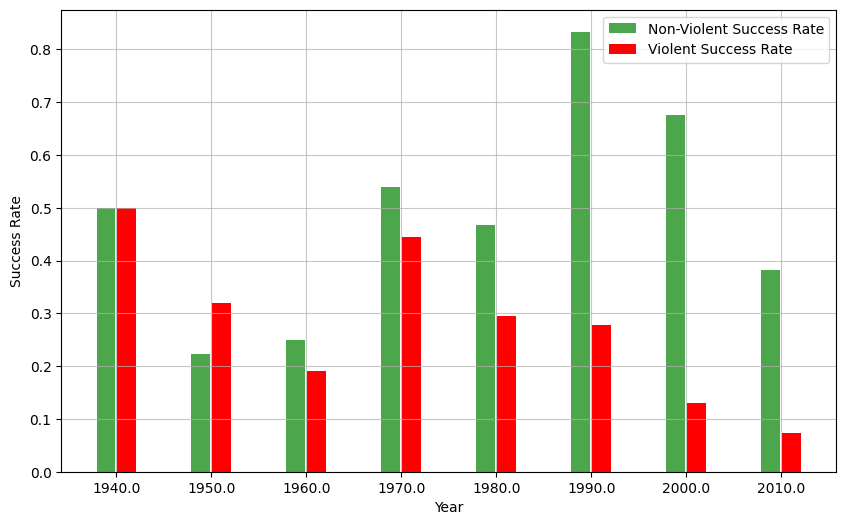

In [143]:
# Plotting
plt.figure(figsize=(10, 6))
#for beauty
bar_width = 2
gap = 0.2
#nonviolent
plt.bar(success_rates['Year'], success_rates['Non-Violent Success Rate'], width=bar_width, color='green', label='Non-Violent Success Rate', alpha=0.7)
#violent
plt.bar(success_rates['Year'] + bar_width + gap, success_rates['Violent Success Rate'], width=bar_width, color='red', label='Violent Success Rate')
#labels & title
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.legend()
#manual ticks
tick_positions = success_rates['Year'] + bar_width / 2 + gap / 2
plt.xticks(tick_positions, success_rates['Year'])
#grid
plt.grid(True, linestyle='-', alpha=0.7)

_ = plt.show()

## 2. Largest Resistance Campaigns, 1946-2014

> Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%.


* First we need to filter our data so that only events with more than `2%` of the population participating appear.

In [145]:
filtered_data = navco_data[navco_data['PERCENTAGEPOPULARPARTICIPATION'] > 0.02]

* We sort our data:

In [147]:
sorted_data = filtered_data.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=True)
sorted_data.head()

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
132,93.0,Hungarian anti-communist,Hungary,1956.0,1956.0,communist regime,0.0,0.0,1.0,0.0,...,0.0,69.0,200000.0,0.020264,1.0,1.0,1.0,0.0,1.0,0.0
89,74.0,East German uprising,East Germany,1953.0,1953.0,Communist regime,0.0,0.0,1.0,0.0,...,0.0,17.0,400000.0,0.022005,1.0,0.0,0.0,0.0,1.0,0.0
352,314.0,Euromaidan,Ukraine,2013.0,2014.0,President Yanukovych,1.0,0.0,0.0,0.0,...,0.0,94.0,1000000.0,0.022089,1.0,1.0,1.0,1.0,1.0,0.0
304,213.0,South Korean anti-military,South Korea,1986.0,1987.0,Mil govt,1.0,0.0,0.0,0.0,...,0.0,510.0,1000000.0,0.023981,1.0,0.0,1.0,0.0,0.0,0.0
292,23.0,anti-Milosevic,Serbia,1996.0,2000.0,Milosevic regime,1.0,0.0,0.0,0.0,...,0.0,1418.0,200000.0,0.026609,1.0,1.0,0.0,0.0,0.0,1.0


* We need to store some of the columns in order to use them when drawing our plot.

In [148]:
events = sorted_data['LOCATION'] + ': ' + sorted_data['TARGET']
participation_percentage = sorted_data['PERCENTAGEPOPULARPARTICIPATION']
success = sorted_data['SUCCESS']
limited = sorted_data['LIMITED']
failure = sorted_data['FAILURE']

* We go ahead and make our plot. 

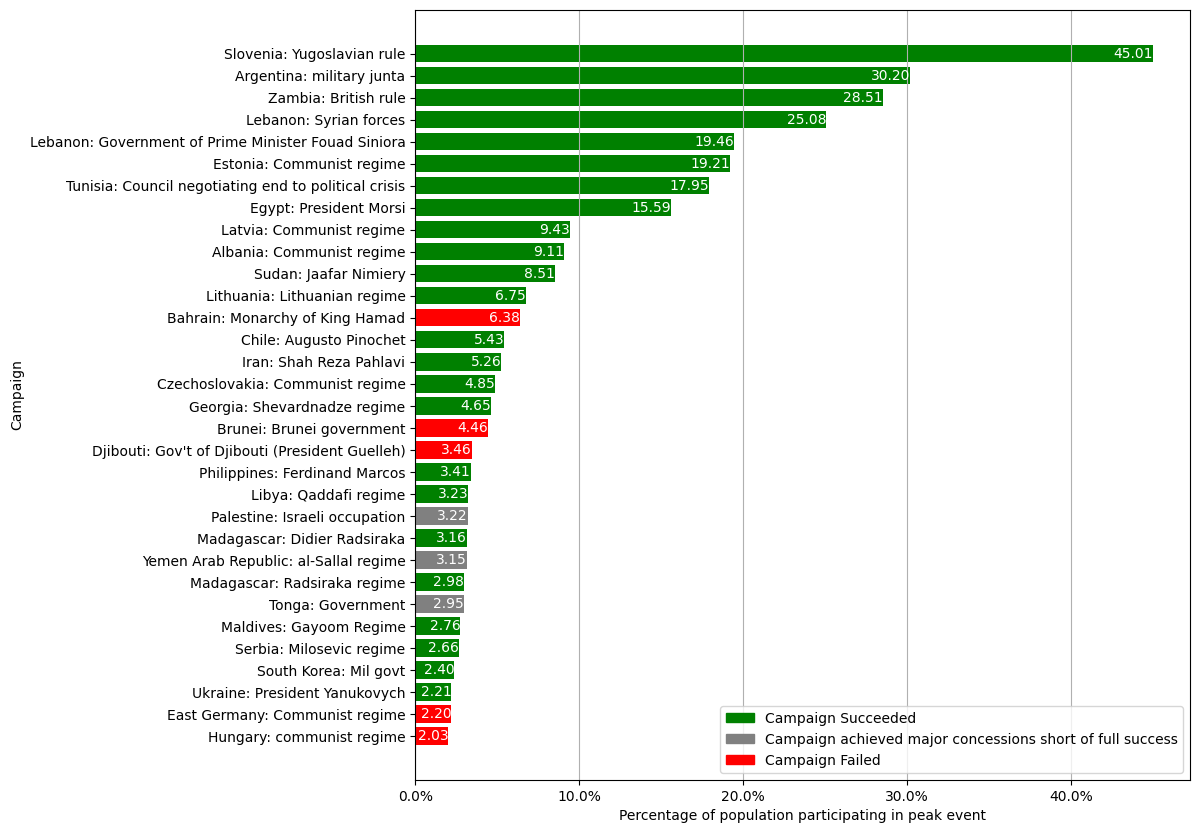

In [149]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(10, 10))
#make bars with color depending on status
bars = ax.barh(events, participation_percentage, color=['green' if s == 1 else 'gray' if l == 1 else 'red' for s, l in zip(success, limited)])
#legend
legend_labels = ['Campaign Succeeded', 'Campaign achieved major concessions short of full success', 'Campaign Failed']
legend_colors = ['green', 'gray', 'red']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_handles, legend_labels, loc='lower right')
#define function to place ticks in wanted format
def percentage_formatter(x, pos):
    return f'{x*100:.1f}%'
# Set the formatter for the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
#add percentages on bars
for bar, percentage in zip(bars, participation_percentage):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage*100:.2f}', 
             va='center', ha='right', color='white')
#labels
ax.set_xlabel('Percentage of population participating in peak event')
ax.set_ylabel('Campaign')
plt.grid(axis = 'x')
_ = plt.show()


> Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

* Let's take a look at the Greek campaigns included:

In [150]:
navco_data[navco_data['LOCATION'] == 'Greece']

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
119,401.0,Greek Civil War,Greece,1946.0,1949.0,British and US occupation,0.0,0.0,1.0,0.0,...,0.0,1778.0,40000.0,0.005092,1.0,0.0,NaN,0.0,1.0,1.0
120,89.0,Greek anti-military,Greece,1973.0,1974.0,Military rule,1.0,0.0,0.0,0.0,...,0.0,654.0,2500.0,0.000279,1.0,1.0,1.0,0.0,1.0,0.0


* The dataset includes the [Greek Civil war](https://en.wikipedia.org/wiki/Greek_Civil_War), as well as the [anti Military rule or *anti-junta* movement](https://en.wikipedia.org/wiki/Greek_junta) that was spearheaded by students around Greece.

## 3. The Effect of Participation on the Probability of Campaign Success

>Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

* First we have to clear out our data so that the numeric values can be logged.

* There are some `PARTICIPATION` values that are `NaN` that are problematic.
* Also some `PERCENTAGE POPULAR PARTICIPATION` values are rounded to `0.0` that when logged give infinite values back.

In [151]:
regression_copy = navco_data.dropna(subset=['PARTICIPATION'])

* We create a dataframe with all columns needed.

* The metrics we use for regression are:
- `Population`: We derive `Population` from:  $$\frac{Participation}{Percentage Popular Participation}$$
* `LogPopulation`: It is the natural log of population: $$ \ln(\text{Population}) $$
* `LogParticipation`: The natural log of participation: $$ \ln(\text{Participation}) $$
* `MembershipPerCapita`: It is the natural log of Population divided by the natural log of participation :  $$\frac{\text{LogParticipation}}{\text{LogPopulation}} = \frac{\ln(\text{Participation})}{\ln(\text{Population})}$$

* We create a new column for each of these metrics.

In [152]:
#regression frame
regression_frame = pd.DataFrame({
    'Participation': regression_copy['PARTICIPATION'],
    'Success': regression_copy['SUCCESS'],
    'PercentagePopulation': regression_copy['PERCENTAGEPOPULARPARTICIPATION'],
    'Population': regression_copy['PARTICIPATION'] / regression_copy['PERCENTAGEPOPULARPARTICIPATION']
})
regression_frame['LogPopulation'] = np.log(regression_frame['Population'])
regression_frame['LogParticipation'] = np.log(regression_frame['Participation'])
regression_frame['MembershipPerCapita'] = regression_frame['LogParticipation'] / regression_frame['LogPopulation']

* Now we can run our regression.

* What we do is try to predict the succes of a campaign based on the MembershipPerCapita of the campaign.

* We include in our model the Logged Population for control.

* We use a control variable since the Population (and, as a result the Logged Population) may have an efect on the outcome of the regression. 
* We would like the added variance the population has on our prediction to be visible so we can look more in depth.

In [153]:
from statsmodels.formula.api import logit
success_logit_model = logit('Success ~ MembershipPerCapita + LogPopulation', data=regression_frame).fit()
success_logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  Success          Pseudo R-squared: 0.130     
Date:                2023-11-30 19:12 AIC:              447.3747  
No. Observations:    380              BIC:              459.1952  
Df Model:            2                Log-Likelihood:   -220.69   
Df Residuals:        377              LL-Null:          -253.58   
Converged:           1.0000           LLR p-value:      5.1893e-15
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
Intercept           -2.8142   1.4961 -1.8811 0.0600 -5.7465 0.1180
MembershipPerCapita  7.6475   1.1664  6.5563 0.0000  5.3613 9.9336
LogPopulation       -0.1388   0.0736 -1.8871 0.0591 -0.2830 0.0054
==================================================================

"""

* As we can see from the summary above, our model has a *Pseudo R-Squared* of `0.1`, which is not optimal, but still it's predictive power is significant.

* Looking at the coefficients of the model, we can make sense of our results:
- `MembershipPerCapita` has a coefficient of `7.5` with a *p-value* of `0`. That means it is statistically important, meaning (in English) that it has a direct effect on Succes.
- More specifically, the probability function we get is: $$ \frac{p(x)}{1 - p(x)} = \exp{(-2.9402 + 7.5047 x1 - 0.1256 x2 )}$$ where x1 is `MembershipPerCapita` and x2 is `LogPopulation`. 

- That means that for every additional `MembershipPerCapita`, the chances of an event succeding are multiplied by `7.5`.
- Or, using the numbers from the dataset, every `0.1` increase in `MembershipPerCapita` multiplies the chances of succes by `7.5%`.

* We can use our model to preddict the probability of success for each campaign:

In [154]:
predictions = success_logit_model.predict(regression_frame)
predictions

0      0.297174
1      0.302691
2      0.334318
3      0.400291
4      0.821845
         ...   
384    0.891321
385    0.449738
386    0.217118
387    0.161809
388    0.273140
Length: 380, dtype: float64

* And, those predictions visually:

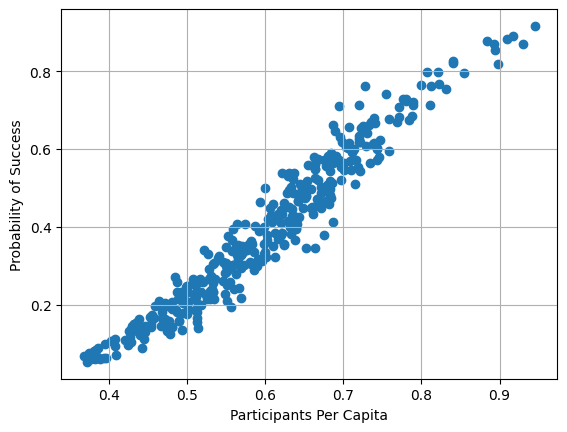

In [155]:
plt.scatter(regression_frame['MembershipPerCapita'], predictions)
plt.xlabel('Participants Per Capita')
plt.ylabel('Probability of Success')
plt.grid(True)
# Set x-axis range
# Set x-axis ticks
plt.show()

* We can see that the scatter plot does not appear as a straight line.

* That's probably due to the influence of the `LogPopulation` control variable.

* The graph points to the fact that maybe the percentage participating isn't the only deciding factor for success, but the population as well.
* Events with similar participations but different populations have different estimates for success, meaning that it's not only the percentage of participation that matters, but the population of that percentage as well.

* We can see what happens when we do not account for the Logged Population:

In [156]:
success_logit_model2 = logit('Success ~ MembershipPerCapita', data=regression_frame).fit()
success_logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.1225
Time:                        19:12:15   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.3469      0.709     -7.536      0.000      -6.737      -3.956
MembershipPerCapita     8.0495      1.141      7.052      0.000       5.812      10.287
=======================================================================================
"""

In [157]:
predictions2 = success_logit_model2.predict(regression_frame)

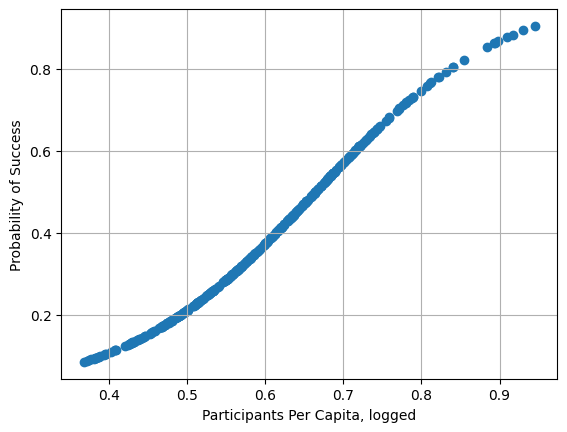

In [158]:
plt.scatter(regression_frame['MembershipPerCapita'], predictions2)
plt.xlabel('Participants Per Capita, logged')
plt.ylabel('Probability of Success')
plt.grid(True)
# Set x-axis range
# Set x-axis ticks
plt.show()